In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.float_format = '{:.6f}'.format
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, fcluster
from scipy.cluster.hierarchy import cophenet

plt.rcParams['figure.figsize'] = [12,7]

In [4]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [24]:
# Converting data types for categorical varibles to Object
for col in df.iloc[:,10:].columns:
    df[col] = df[col].astype('object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

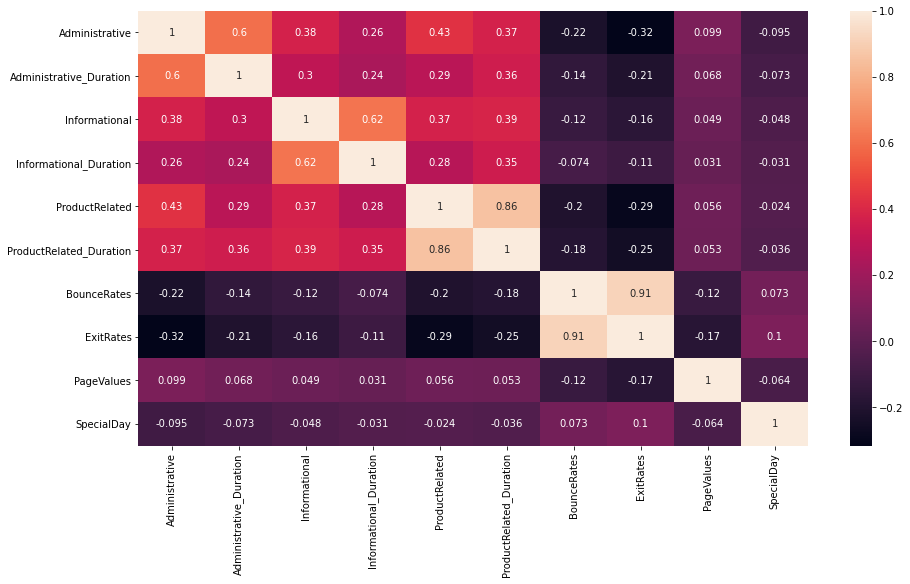

In [28]:
sns.heatmap(df.corr(), annot = True)
plt.show()

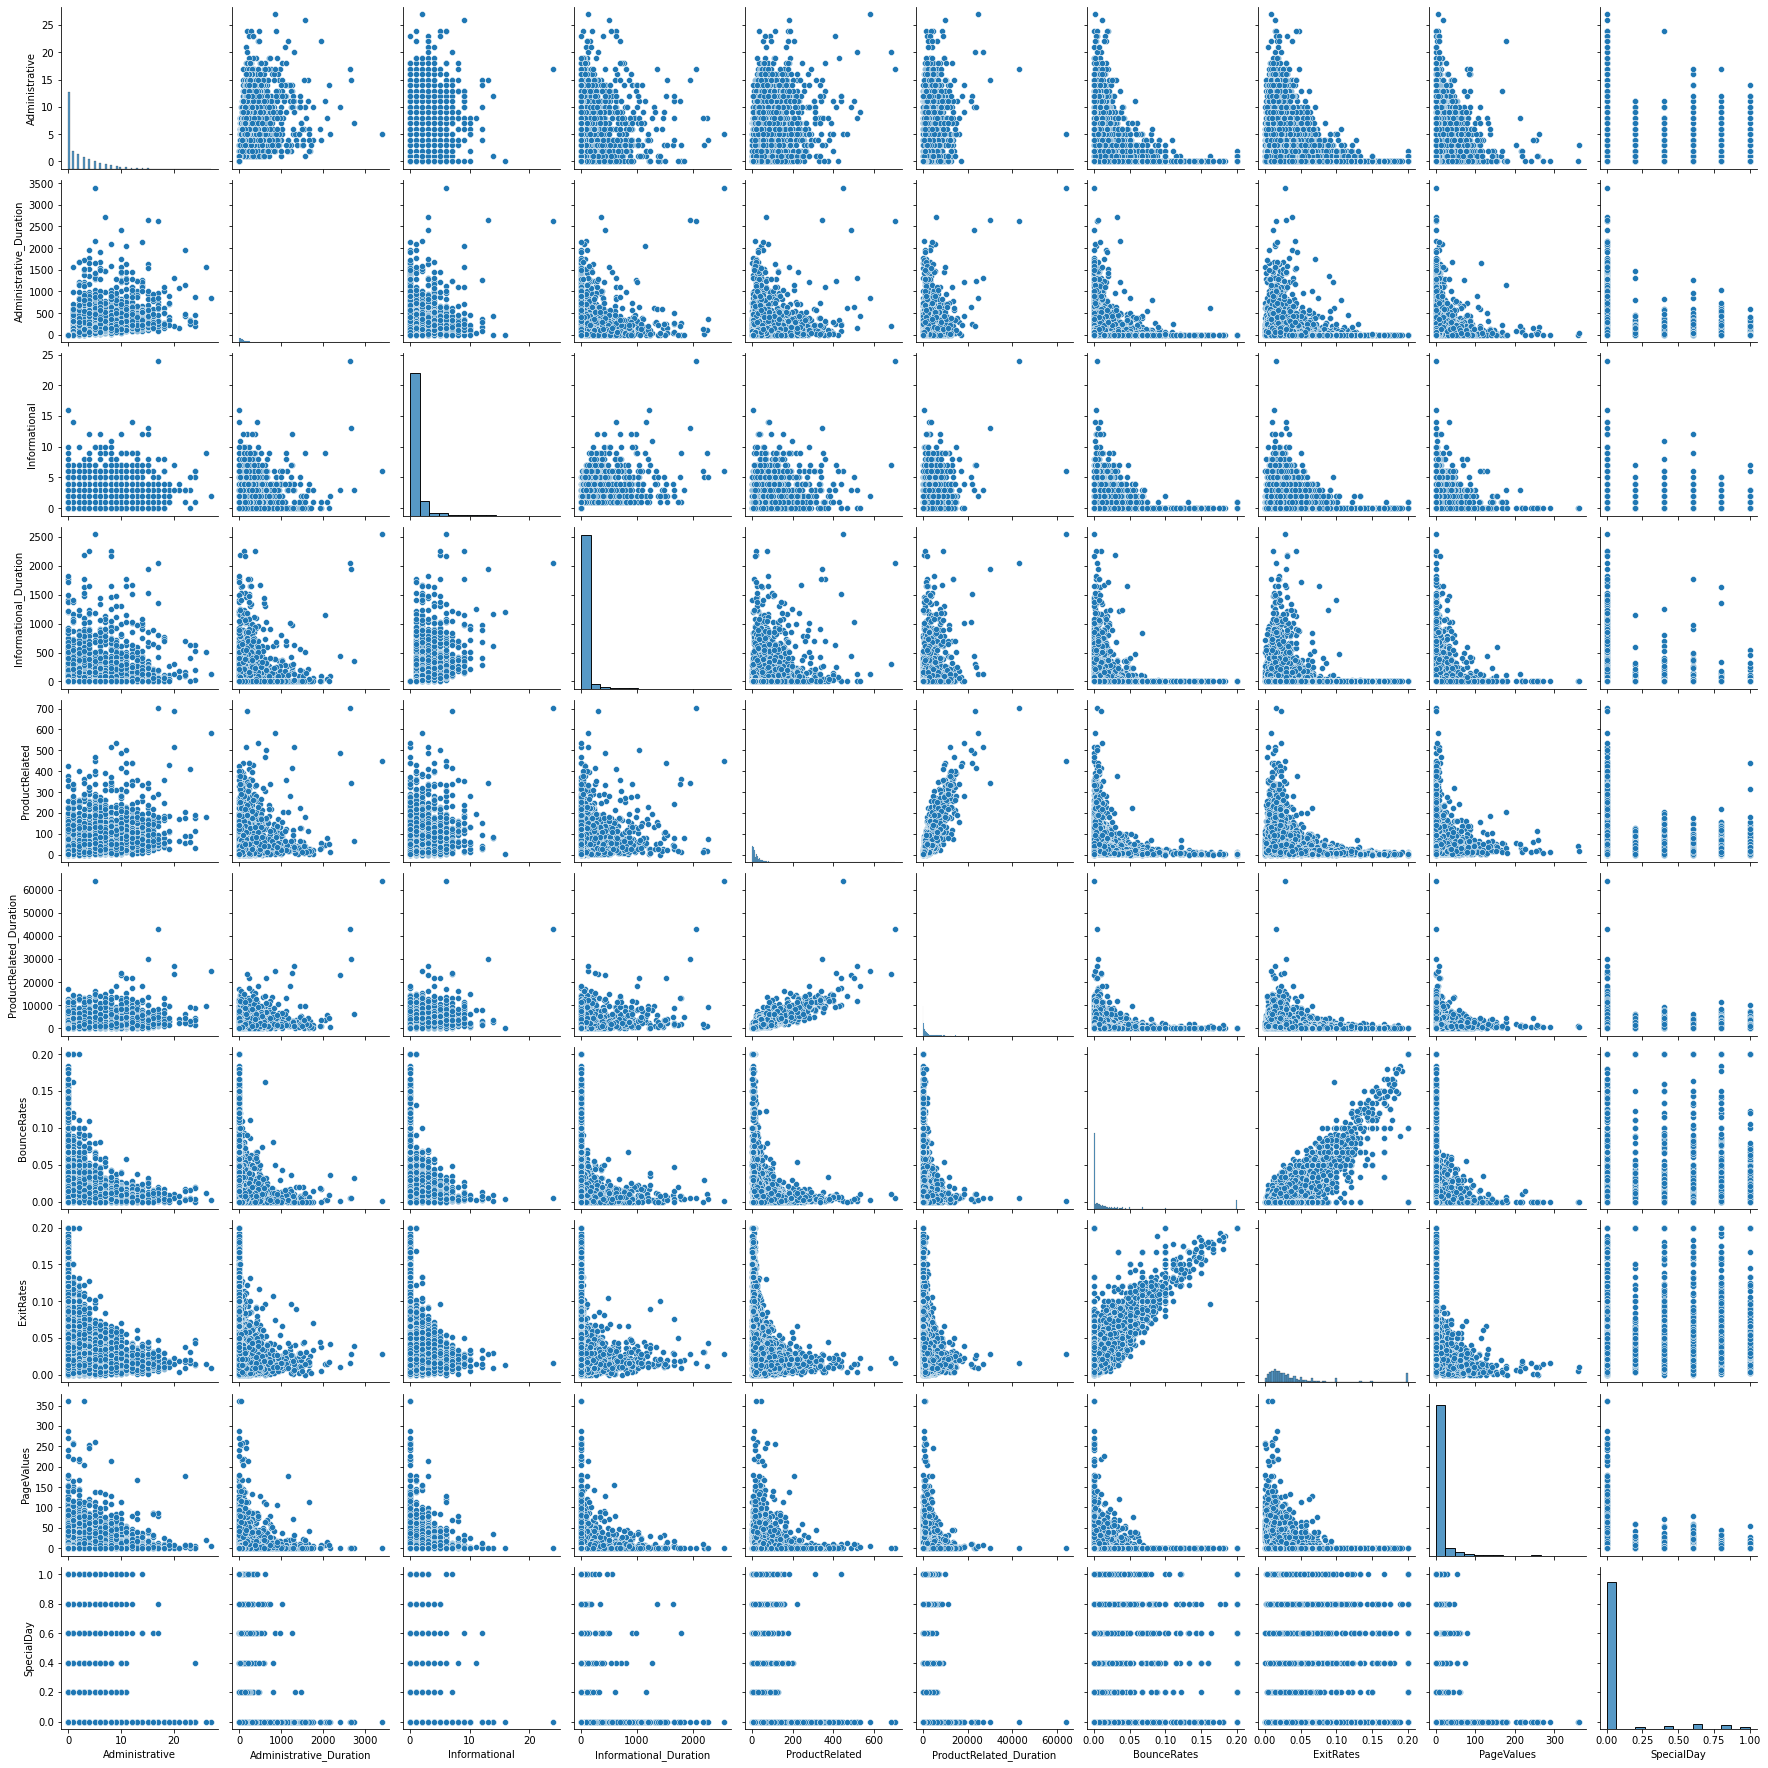

In [62]:
sns.pairplot(df.iloc[:,:10])

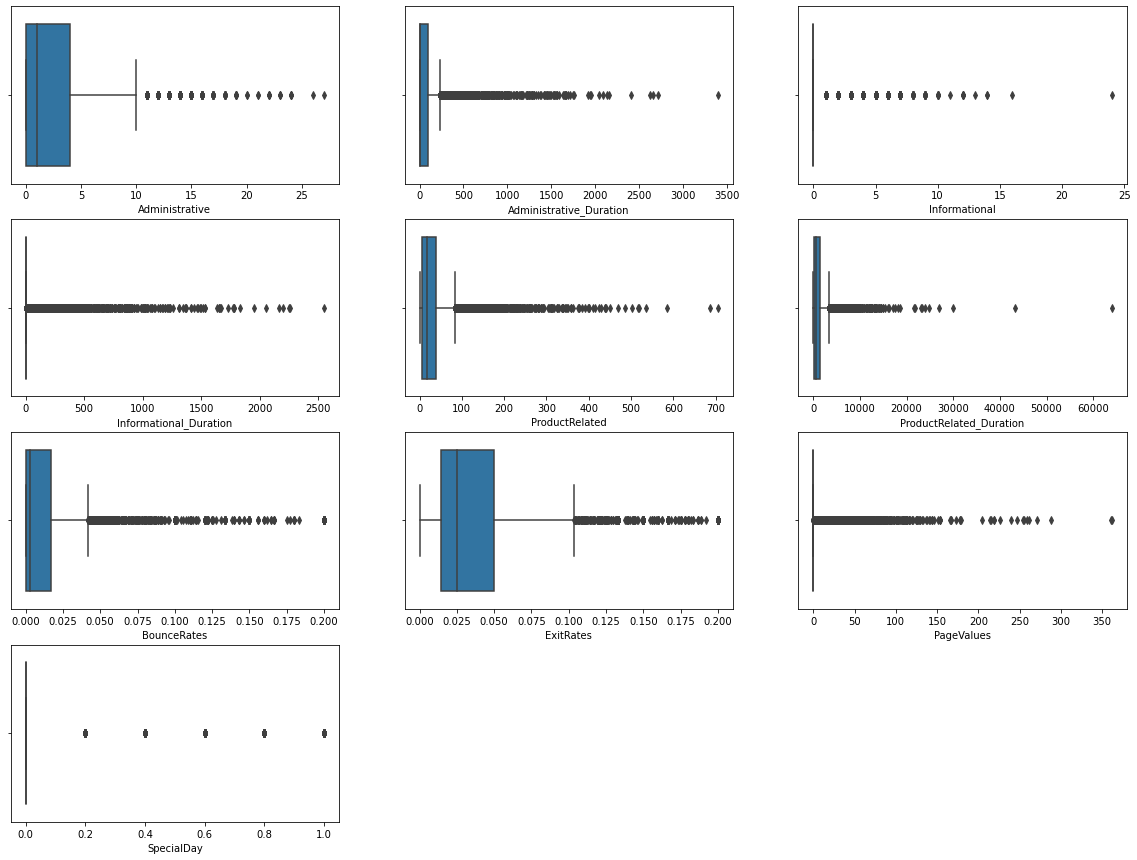

In [36]:
i = 1
for col in df.iloc[:,:10].columns:
    plt.subplot(4,3,i)
    sns.boxplot(df[col])
    i += 1

Administrative 1.9603572090790138
Administrative_Duration 5.61571901877419
Informational 4.036463759943139
Informational_Duration 7.579184715734214
ProductRelated 4.341516415550065
ProductRelated_Duration 7.263227682561318
BounceRates 2.947855266695535
ExitRates 2.1487889999009804
PageValues 6.382964248998133
SpecialDay 3.3026667472572897


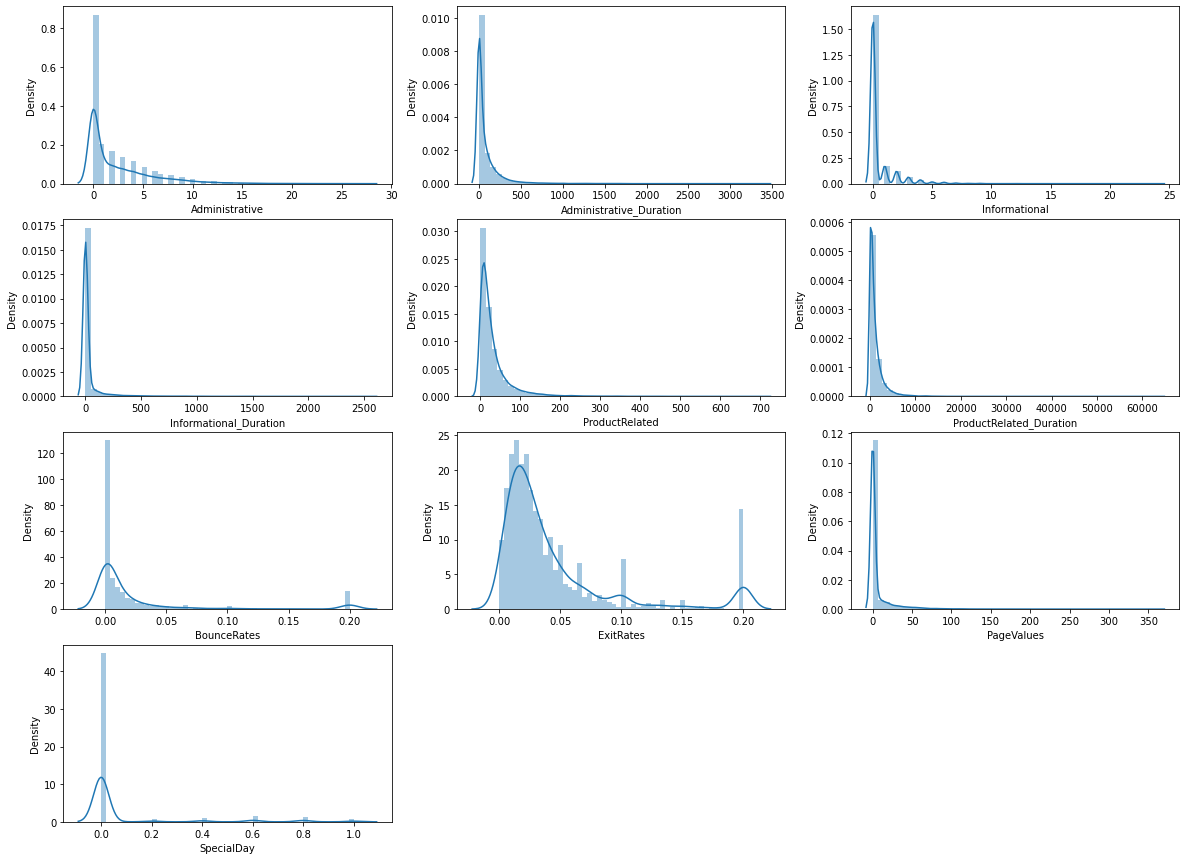

In [46]:
i = 1
for col in df.iloc[:,:10].columns:
    plt.subplot(4,3,i)
    sns.distplot(df[col])
    i += 1
    print(col,df[col].skew())

In [53]:
df.iloc[:,:10].columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

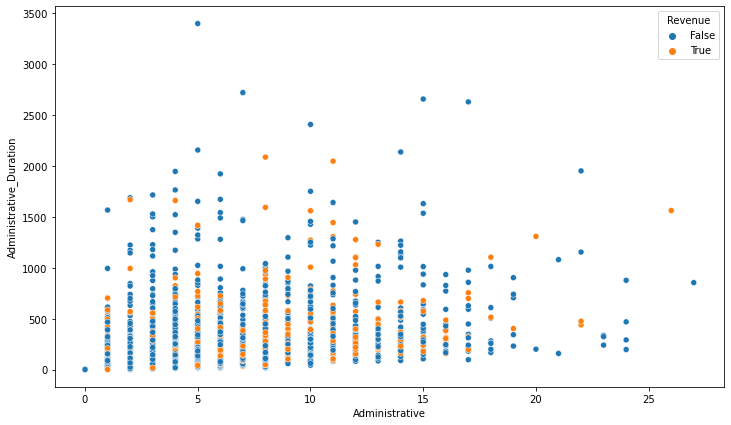

In [57]:
sns.scatterplot(data = df, x = 'Administrative', y = 'Administrative_Duration', hue = 'Revenue')

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

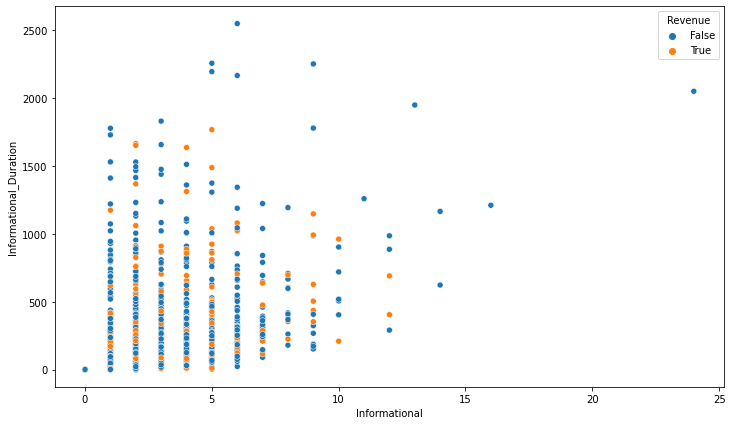

In [58]:
sns.scatterplot(data = df, x = 'Informational', y = 'Informational_Duration', hue = 'Revenue')

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

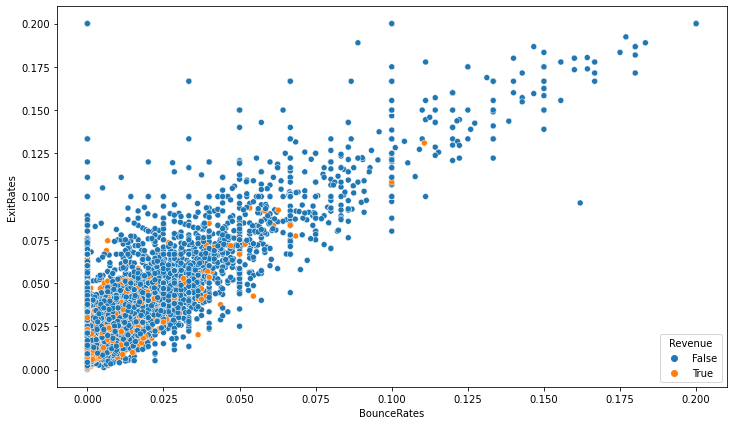

In [59]:
sns.scatterplot(data = df, x = 'BounceRates', y = 'ExitRates', hue = 'Revenue')

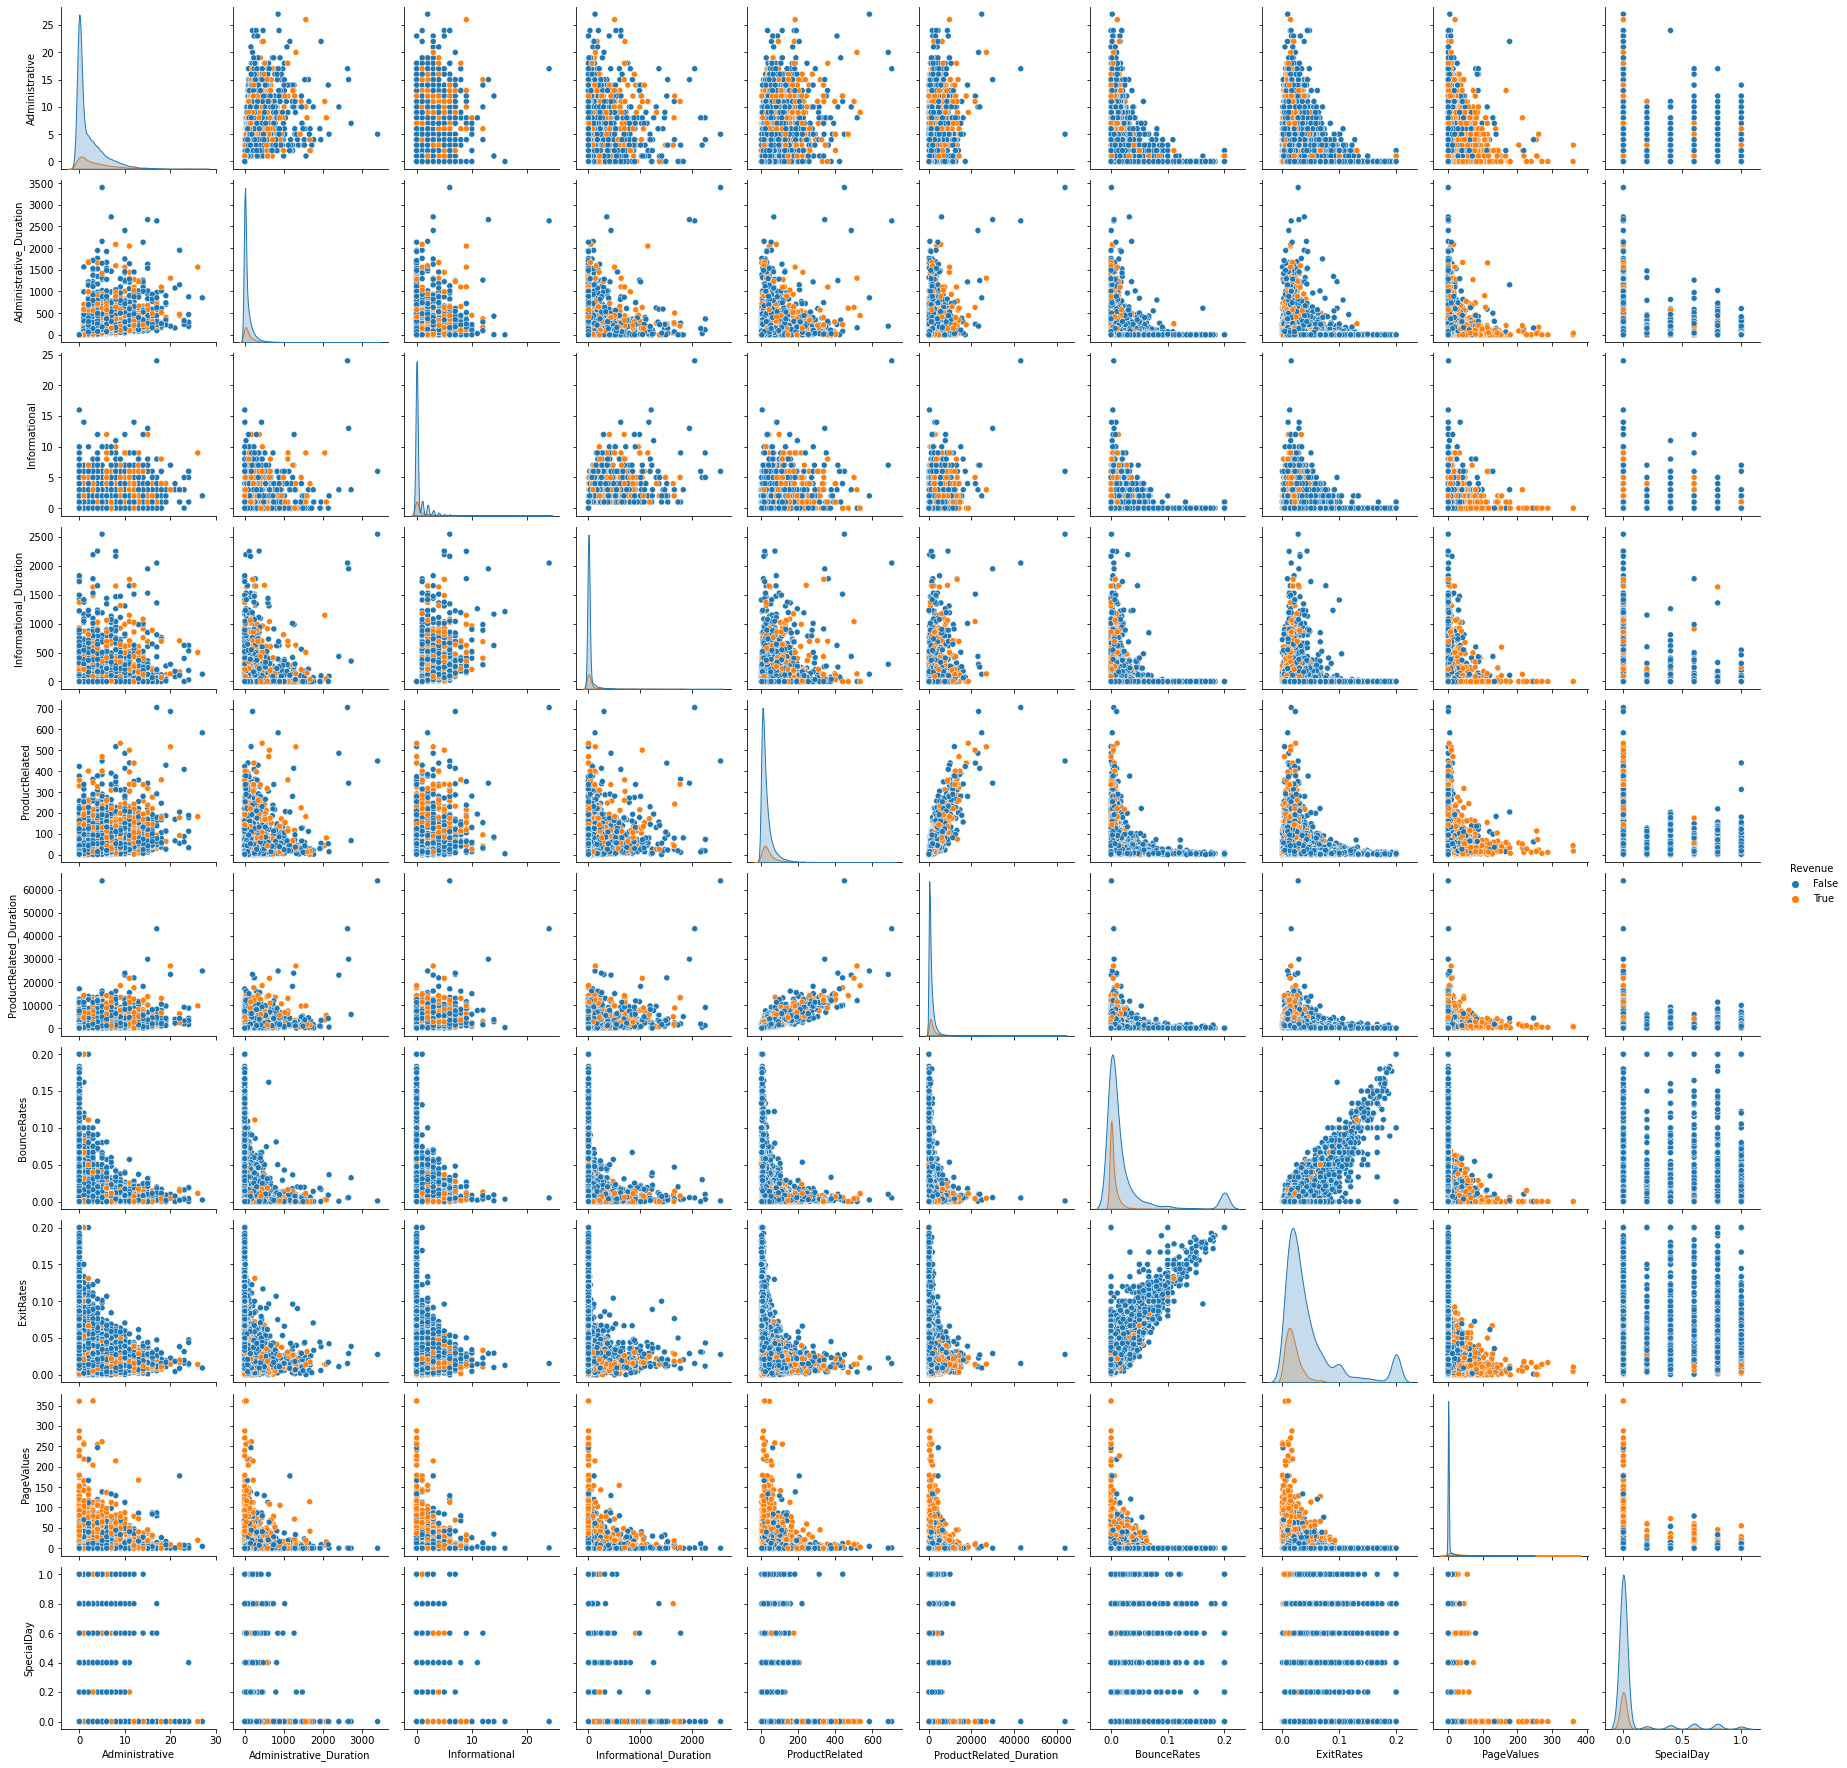

In [63]:
# Multivariate Analysis
sns.pairplot(data = df,x_vars=df.iloc[:,:10].columns,y_vars=df.iloc[:,:10].columns, hue= 'Revenue')

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df1 = df[((df < (Q1 - 3.5 * IQR)) | (df > (Q3 + 3.5 * IQR))).any(axis=1)]

# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df = df.reset_index(drop=True)
# df.shape
df1.shape

(6254, 18)

In [71]:
SS = StandardScaler()
X = SS.fit_transform(df.iloc[:,:10])
X = pd.DataFrame(X, columns = df.iloc[:,:10].columns)
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
std,1.000041,1.000041,1.000041,1.000041,1.000041,1.000041,1.000041,1.000041,1.000041,1.000041
min,-0.696993,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,-0.457683,-0.886371,-0.317178,-0.308821
25%,-0.696993,-0.457191,-0.396478,-0.244931,-0.556092,-0.528121,-0.457683,-0.592393,-0.317178,-0.308821
50%,-0.395938,-0.414764,-0.396478,-0.244931,-0.308755,-0.311357,-0.393490,-0.368691,-0.317178,-0.308821
75%,0.507228,0.070360,-0.396478,-0.244931,0.140949,0.140788,-0.110935,0.142551,-0.317178,-0.308821
max,7.431499,18.769559,18.499599,17.868683,15.138577,32.806777,3.667189,3.229316,19.166337,4.718598


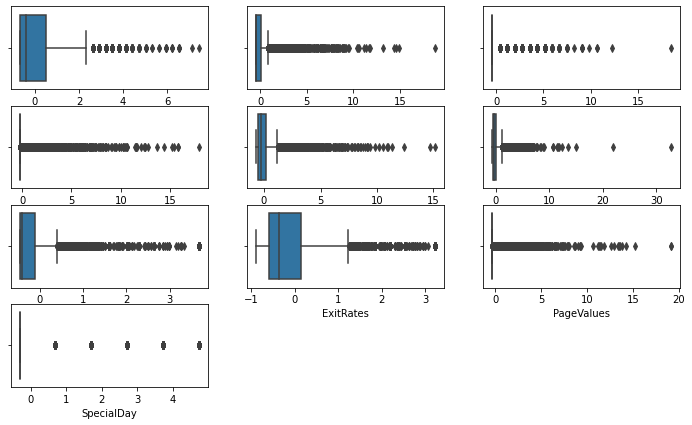

In [72]:
i = 1
for col in X.columns:
    plt.subplot(4,3,i)
    sns.boxplot(X[col])
    i += 1